In [1]:
from matplotlib import pyplot as plt 
import matplotlib
import numpy as np
import os
from os.path import join as opj
import json
import seaborn as sns

In [232]:
with open('/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/scene_predictor/real_experiments/13_mar/transformer/9_mar/all_medium/2024-03-07_22-01-46/contact_window_results.json', 'r') as f:
    data = json.load(f)

In [233]:
len(data[0]['iou']['movable'][0])

829

In [234]:
len(data[0]['iou']['static'][0])

651

In [235]:
pad = abs(data[0]['contact_window']['movable'][0] - data[0]['contact_window']['static'][0])
pad
# 0, 1, 2, 4, 7, 9, 11
# 3, 6, 10, 12 - mov
# 5, 8- static

178

([41, 411],
 [63, 411],
 370,
 '/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/real_robot_data/8_mar_medium/feb21/2/2024-03-08_19-29-02.npz')

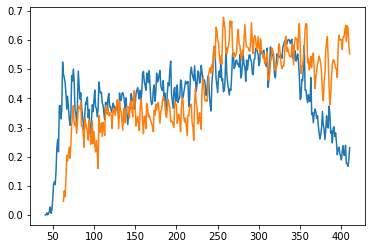

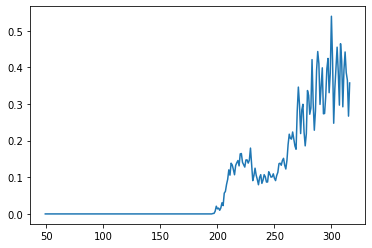

In [7]:
# plt.plot(np.arange(*data[5]['contact_window']['movable']), data[5]['iou']['movable'][0])
plt.plot(np.arange(*data[2]['contact_window']['static']), data[2]['iou']['static'][0])

In [8]:
mov_ious = []
sta_ious = []
final_mov = []
final_sta = []
df = []
 # [1, 6, 7, 9, 10, 12, 13]
for i in list(range(len(data))):
    if '2023' in data[i]['datafile'].split('real_robot_data/')[1]:
        # print(df[-1])
        continue
    df.append(data[i]['datafile'].split('real_robot_data/')[1])
    # print(np.mean(data[i]['iou']['movable'][0]), np.mean(data[i]['iou']['static'][0]))
    mov_ious.append(np.mean(data[i]['iou']['movable'][0]))
    sta_ious.append(np.mean(data[i]['iou']['static'][0]))
    final_mov.append(data[i]['iou']['movable'][0][-1])
    final_sta.append(data[i]['iou']['static'][0][-1])
    print(df[-1], i, mov_ious[-1], sta_ious[-1], final_mov[-1], final_sta[-1])

3_mar_medium/7/2024-03-03_22-57-35.npz 0 0.43043814221419285 0.3698748812960139 0.37695359470103446 0.34478157175628993
3_mar_medium/0/2024-03-03_20-47-06.npz 2 0.4243497439386145 0.0907629262314093 0.49562372867698573 0.3573567603313785
3_mar_medium/10/2024-03-03_20-44-40.npz 3 0.42655130827774695 0.39660873433739474 0.5360409062049115 0.3878400908181251
3_mar_medium/4/2024-03-03_22-46-27.npz 4 0.23133453369725612 0.11176436994025804 0.16233950045442547 0.48733629674503187
3_mar_medium/3/2024-03-03_22-44-22.npz 5 0.4888656814729455 0.07045649220742001 0.08611742557509247 0.009101641657291772
3_mar_medium/1/2024-03-03_23-02-22.npz 8 0.5012234833122178 0.29931368145692905 0.5090651006335615 0.24035515238257293
3_mar_medium/8/2024-03-03_22-59-54.npz 11 0.32905934712549506 0.3643847447875411 0.25614024234986954 0.5516830511143239
3_mar_medium/5/2024-03-03_22-51-21.npz 14 0.2904955065086614 0.46761455175800554 0.16201789867576946 0.43350176263808005
8_mar_medium/aug26/1/2024-03-08_19-40-33

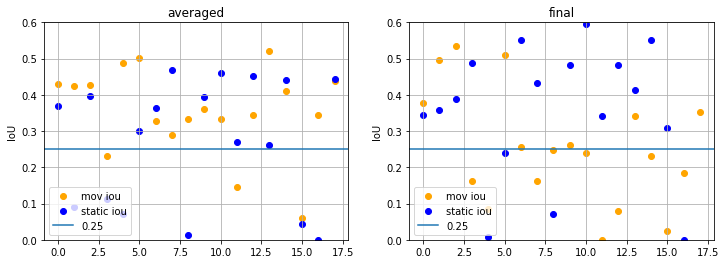

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes.flatten()
ax[0].scatter(range(len(mov_ious)), mov_ious, label='mov iou', color='orange')
ax[0].scatter(range(len(sta_ious)), sta_ious, label='static iou', color='blue')
ax[0].axhline(0.25, label='0.25')
ax[0].set(ylim=(0, 0.6), ylabel='IoU', title='averaged')
ax[0].legend(loc='lower left')
ax[0].grid()

ax[1].scatter(range(len(final_mov)), final_mov, label='mov iou', color='orange')
ax[1].scatter(range(len(final_sta)), final_sta, label='static iou', color='blue')
ax[1].axhline(0.25, label='0.25')
ax[1].set(ylim=(0, 0.6), ylabel='IoU', title='final')
ax[1].legend(loc='lower left')
ax[1].grid()

In [10]:
np.mean(mov_ious), np.mean(sta_ious)
np.median(mov_ious), np.median(sta_ious)

(0.35306349010193927, 0.3318492131222351)

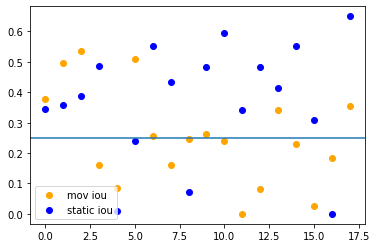

In [12]:
np.mean(final_mov), np.mean(final_sta)
# np.median(final_mov), np.median(final_sta)

(0.25273775303611085, 0.37292159954102505)

In [13]:
df[:15]

['3_mar_medium/7/2024-03-03_22-57-35.npz',
 '3_mar_medium/0/2024-03-03_20-47-06.npz',
 '3_mar_medium/10/2024-03-03_20-44-40.npz',
 '3_mar_medium/4/2024-03-03_22-46-27.npz',
 '3_mar_medium/3/2024-03-03_22-44-22.npz',
 '3_mar_medium/1/2024-03-03_23-02-22.npz',
 '3_mar_medium/8/2024-03-03_22-59-54.npz',
 '3_mar_medium/5/2024-03-03_22-51-21.npz',
 '8_mar_medium/aug26/1/2024-03-08_19-40-33.npz',
 '8_mar_medium/aug26/2/2024-03-08_19-42-32.npz',
 '8_mar_medium/aug26/0/2024-03-08_19-38-25.npz',
 '8_mar_medium/aug30/0/2024-03-08_19-45-05.npz',
 '8_mar_medium/feb21/0/2024-03-08_19-25-05.npz',
 '8_mar_medium/feb21/1/2024-03-08_19-27-31.npz',
 '8_mar_medium/feb21/2/2024-03-08_19-29-02.npz']

In [14]:
len(df[15:])

3

In [3]:
import cv2

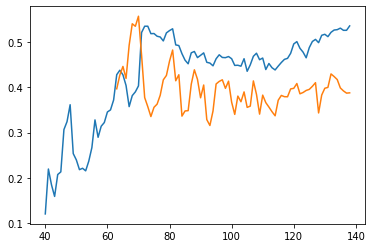

In [4]:
with open('/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/scene_predictor/real_experiments/13_mar/transformer/9_mar/all_medium/2024-03-07_22-01-46/contact_window_results.json', 'r') as f:
    data = json.load(f)
idx = 3
# 1, 6, 7, 9, 10, 12, 13
plt.plot(np.arange(*data[idx]['contact_window']['movable']), data[idx]['iou']['movable'][0])
plt.plot(np.arange(*data[idx]['contact_window']['static']), data[idx]['iou']['static'][0])

offset_m_i = data[idx]['contact_window']['movable'][0]
offset_s_i = data[idx]['contact_window']['static'][0]

offset_m_i, offset_s_i, data[idx]['datafile']

save_path = f'/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/{idx}'
if not os.path.exists(save_path):
    os.makedirs(save_path)
# data[idx]['contact_window']['movable'], data[idx]['contact_window']['static'], len(data[idx]['iou']['movable'][0]), data[idx]['datafile']

In [5]:
main_path = '/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/scene_predictor/real_experiments/13_mar/transformer/9_mar/all_medium'
plot = f'2024-03-07_22-01-46/plot_{idx}.mp4'
video_path = opj(main_path, plot)
i = 0
ctr = 0
selected_frames = [65, 100, 150, 200, 260, 290]
# selected_frames = [60, 80, 100, 120, 140, 160]
# selected_frames = [100, 200, 300, 400, 500]
selected_frames = np.arange(1, 7) * 20 # [100, 200, 300, 400, 500]
# fig, ax = plt.subplots(1, len(selected_frames), figsize=(20, 10), dpi=300)
cap = cv2.VideoCapture(video_path)
# last_m_i = 60
# last_s_i = 60
if not cap.isOpened():
    print("Error: Could not open video.")
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    i += 1
    
    # print(i)
    m_iou = []
    s_iou = []

    if i in selected_frames:
        print(i)
        print(f'{save_path}/frame_{i}.jpg')
        cv2.imwrite(f'{save_path}/frame_{i}.png', frame)
        # image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # ax[ctr].imshow(image_rgb)
        # ax[ctr].axis('off')
        # ctr += 1
# fig.savefig(f'{save_path}/result_{idx}.jpg', bbox_inches='tight')

20
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_20.jpg
40
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_40.jpg
60
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_60.jpg
80
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_80.jpg
100
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_100.jpg
120
/common/home/dm1487/robotics_research/legged_manipulation/gaited-walk/test_folder/3/frame_120.jpg
Can't receive frame (stream end?). Exiting ...


[2.4 3.2 4.8]
0.3454365265765113
0.5256719574426187
0.49607959389813094
[2.4, 3.2, 4.8] [0.3454365265765113, 0.5256719574426187, 0.49607959389813094]
[3.2, 4.8] [0.4580133108854184, 0.39777145151455423]


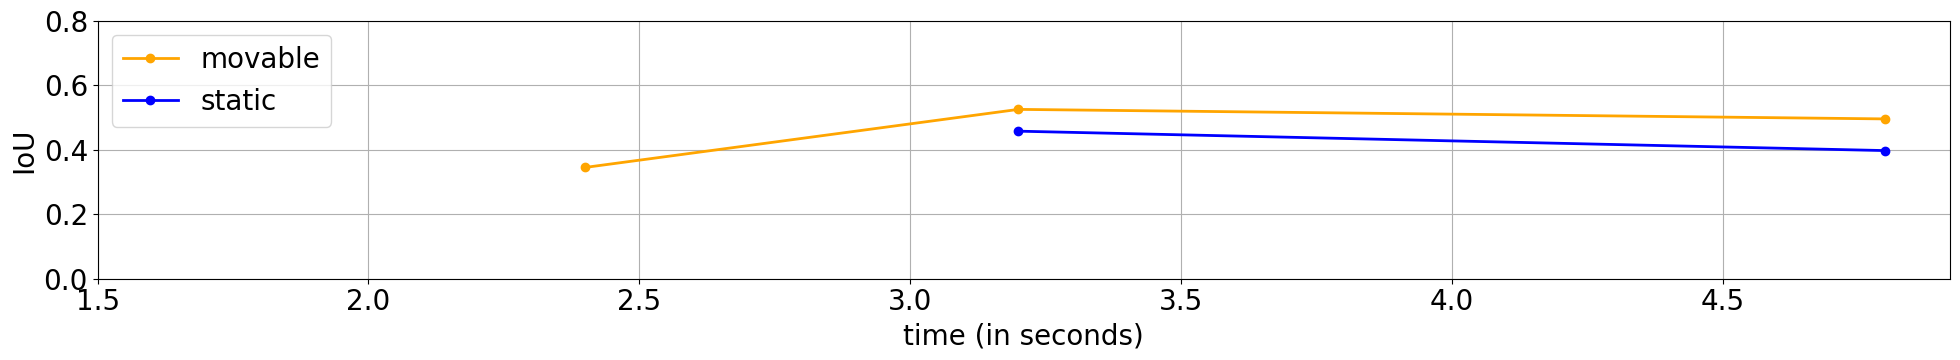

In [15]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 4), dpi=100)
# selected_frames = [65, 100, 150, 200, 300]
selected_frames = [60, 80, 120]
time_labels = np.array(selected_frames) * 1/25
print(time_labels)
m_iou = []
m_time_labels = []
s_time_labels = []
data_idx = idx
# offset_m_i = 41
for i in selected_frames:
    if i < offset_m_i or i == 40: 
        print(i)
        continue
    m_time_labels.append(i * 1/25)
    print(data[data_idx]['iou']['movable'][0][i - offset_m_i])
    m_iou.append(data[data_idx]['iou']['movable'][0][i - offset_m_i])
s_iou = []
for i in selected_frames:
    if i < offset_s_i: 
        continue
    s_time_labels.append(i * 1/25)
    s_iou.append(data[data_idx]['iou']['static'][0][i - offset_s_i])


print(m_time_labels, m_iou)
print(s_time_labels, s_iou)
plt.plot(m_time_labels, m_iou, '-o', color='orange', label='movable', linewidth=2.0)
plt.plot(s_time_labels, s_iou, '-o', color='blue', label='static', linewidth=2.0)
# plt.scatter(m_time_labels, m_iou, color='orange')
# plt.scatter(s_time_labels, s_iou, color='blue')
# plt.title('IoU in the contact window')
plt.ylim(0, 0.8)
plt.xlim(1.5)
plt.ylabel('IoU')
plt.xlabel('time (in seconds)')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig(f'{save_path}/result_{idx}_iou.jpg',  bbox_inches='tight')

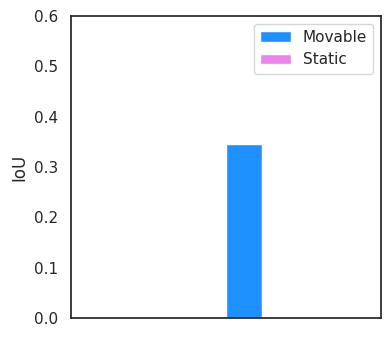

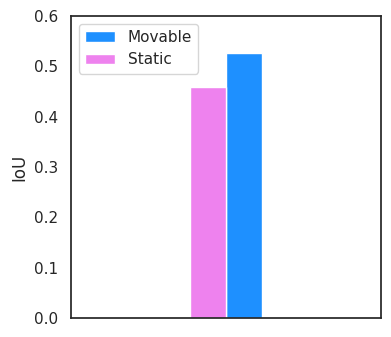

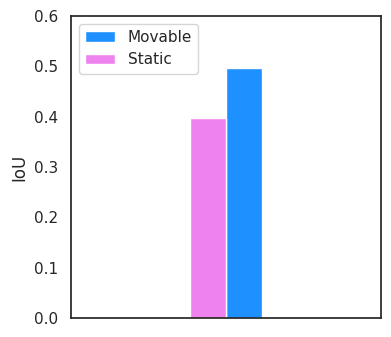

In [49]:
# Create figure and axes
import seaborn as sns
plt.rcParams.update({'font.size': 20})
a = [0.3454365265765113, 0.5256719574426187, 0.49607959389813094]
b = [0, 0.4580133108854184, 0.39777145151455423]

for i in range(3):
    sns.set_theme(style="white")
    fig, axs = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    width = 0.35
    # a = [2.4, 3.2, 4.8] 
    
    
    axs.set(ylim =(0, 0.6), xlim =(-1.5, 1.5), ylabel='IoU', xticks=[])
    
    # axs.set()
    axs.bar(0 + width/2, a[i], width, label='Movable', color='dodgerblue')
    axs.bar(0 - width/2, b[i], width, label='Static', color='violet')
    axs.legend()
    
    fig.savefig(f'{save_path}/plots_{i}.jpg', bbox_inches='tight')
# axs[1].set(ylim =(0, 0.6))
# axs[1].bar(0 + width/2, a[1], width, label='Movable', color='dodgerblue')
# axs[1].bar(0 - width/2, b[1], width, label='Static', color='violet')
# axs[1].legend()

# axs[2].set(ylim =(0, 0.6))
# axs[2].bar(0 + width/2, a[2], width, label='Movable', color='dodgerblue')
# axs[2].bar(0 - width/2, b[2], width, label='Static', color='violet')
# axs[2].legend()

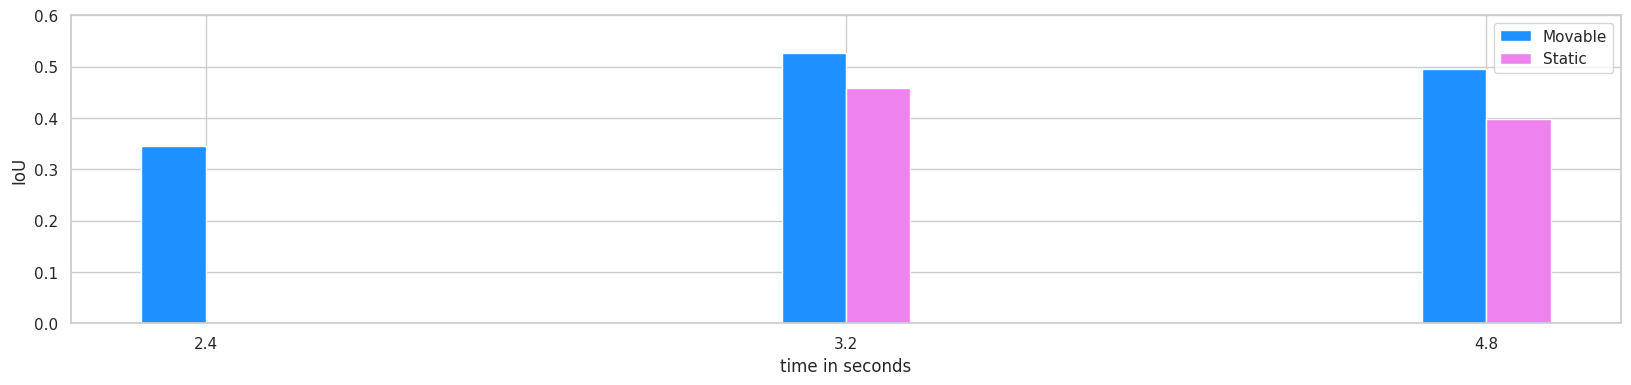

<Figure size 640x480 with 0 Axes>

In [61]:
# Resetting matplotlib style to default
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 20})

# Data
a = [0.3454365265765113, 0.5256719574426187, 0.49607959389813094]
b = [0, 0.4580133108854184, 0.39777145151455423]
x_labels = ['2.4', '3.2', '4.8']

# Setup
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 4), dpi=100)
width = 0.1  # the width of the bars
x = np.arange(len(x_labels))  # the label locations

# Bars
rects1 = ax.bar(x - width/2, a, width, label='Movable', color='dodgerblue')
rects2 = ax.bar(x + width/2, b, width, label='Static', color='violet')

# Labels, titles and custom x-axis tick labels, etc.
ax.set_xlabel('time in seconds')
ax.set_ylabel('IoU')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 0.6)
ax.legend()

plt.show()
plt.savefig(f'{save_path}/full_plot.jpg', bbox_inches='tight')

In [11]:
main_path = '/common/home/dm1487/Downloads/trajectories_final_3_mar/21_feb_policy'
video_path = opj(main_path, '001/traj.avi')

i = 0
ctr = 0
# selected_frames = [65, 100, 150, 200, 260, 300]
# selected_frames = [60, 80, 100, 120, 140, 160]
# selected_frames = [100, 200, 300, 400, 500]
# selected_frames = np.arange(1, 6) * 60 # [100, 200, 300, 400, 500]
# fig, ax = plt.subplots(1, len(selected_frames), figsize=(20, 6), dpi=200)
cap = cv2.VideoCapture(video_path)
# last_m_i = 60
# last_s_i = 60
if not cap.isOpened():
    print("Error: Could not open video.")
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    i += 1
    
    # print(i)
    m_iou = []
    s_iou = []
    
    if i - 225 in selected_frames:
        # image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # ax[ctr].imshow(image_rgb)
        # ax[ctr].axis('off')
        # print(f'{save_path}/frame_{i}.jpg')
        cv2.imwrite(f'{save_path}/real_frame_{i}.png', frame)
        ctr += 1
# fig.savefig(f'test_folder/real_result_{idx}.jpg', bbox_inches='tight')

Can't receive frame (stream end?). Exiting ...
